# Q1. Explain the difference between simple linear regression and multiple linear regression. Provide an example of each.

Simple linear regression is a statistical method used to model the relationship between two variables: a dependent variable (also called the response variable) and an independent variable (also called the predictor variable). It assumes that the relationship between these variables can be represented by a straight line equation:

y=β0+β⋅x

Where:

y is the dependent variable.

x is the independent variable.

β0 is the intercept of the line.

β1 is the slope of the line, indicating how much y changes for a unit change in x.

Imagine you work for an ice cream stand, and you're curious to know how the temperature affects the amount of ice cream you sell. You decide to collect some data over a week where you record the daily temperature (in degrees Celsius) and the corresponding ice cream sales (in units).

Temperature (C)	

25
30	
20	
32	
18	

Ice Cream Sales

250
180
280
160

Ice Cream Sales=β0 + β1⋅Temperature

β0 is the intercept of the line

β1 is the slope of the line, representing how much ice cream sales change for a one-degree increase in temperature.

Multiple linear regression extends the concept of simple linear regression to include more than one independent variable. It's used when the relationship between the dependent variable and the predictor variables is assumed to be linear, but with multiple predictors. The general equation for multiple linear regression is:

y=β0+β1⋅x1+β2⋅x2+…+βp⋅xp

Where:

�
y is the dependent variable.

x1,x2,…,xp are the independent variables (predictors).

β0 is the intercept.

β1,β2,…,βp are the coefficients representing the effect of each predictor on y.

 Predicting Ice Cream Sales with Multiple Linear Regression

In this example, we'll consider the same ice cream sales data as before, but this time we'll also include another variable: the amount of money spent on advertising for each day.

Temperature (C)	
25	
30	
20	
32	
18	

Advertising Spending ($)

100
150	
80	
200	
70	

Ice Cream Sales

200
250
180
280
160

The multiple linear regression equation becomes:

Ice Cream Sales=β0+β1⋅Temperature+β2⋅Advertising Spending

Ice Cream Sales=50+4⋅Temperature+1.5⋅Advertising Spending

The intercept (β0) of 50 suggests that if both temperature and advertising spending are zero, you can expect to sell 50 units of ice cream (baseline sales).

The coefficient β1 of 4 for temperature indicates that for every one-degree increase in temperature, you can expect to sell around 4 more units of ice cream, assuming advertising spending remains constant.

The coefficient β2 of 1.5 for advertising spending implies that for every additional dollar spent on advertising, you can expect to sell an additional 1.5 units of ice cream, assuming temperature remains constant.

Ice Cream Sales=50+4⋅28+1.5⋅120=282

# Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in a given dataset?

Assumption 1: Linear Relationship

Explanation

The first assumption of linear regression is that there is a linear relationship between the dependent variable x, and the independent variable, y.

How to Check?

A simple pairplot of the dataframe can help us see if the Independent variables exhibit linear relationship with the Dependent Variable.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
ad_data = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


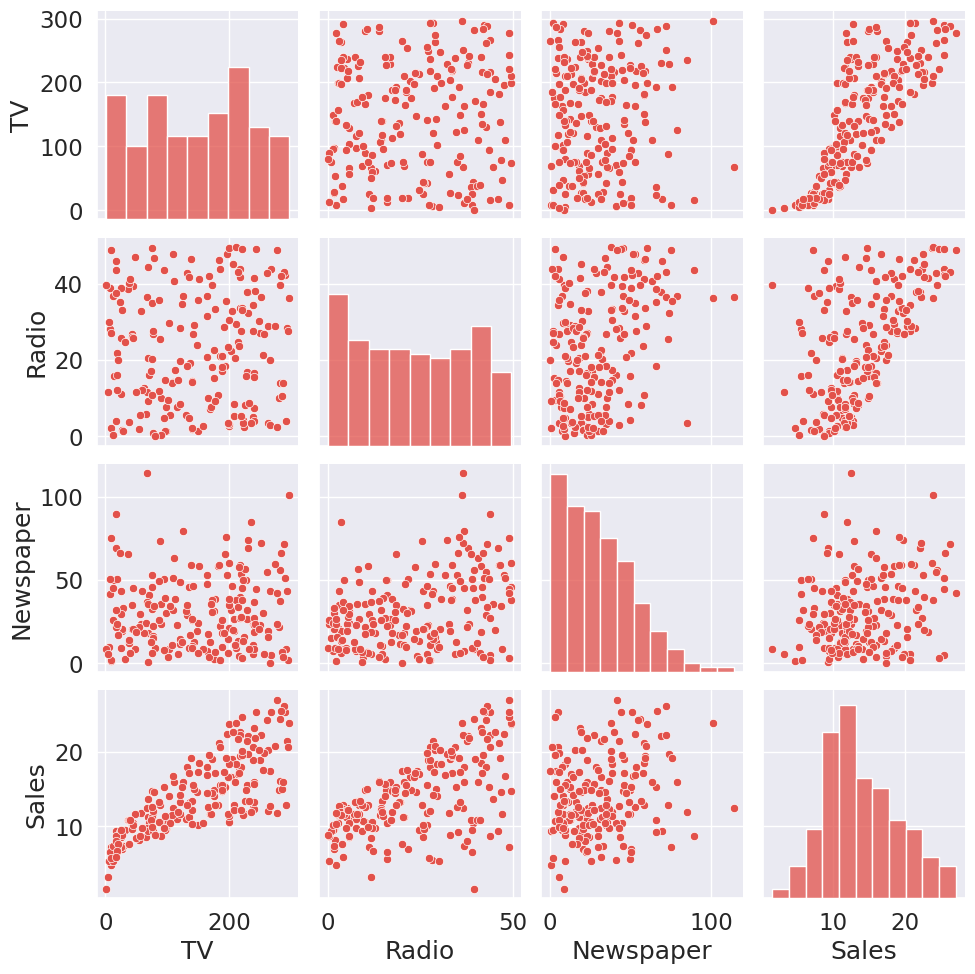

In [5]:
p = sns.pairplot(ad_data)

In [10]:
# Fitting the linear model

x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


Assumption 2: Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [11]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -5.684341886080802e-16


Assumption 3:Check for Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

How to Check?

Residual vs Fitted values plot can tell if Heteroskedasticity is present or not.
If the plot shows a funnel shape pattern, then we say that Heteroskedasticity is present.

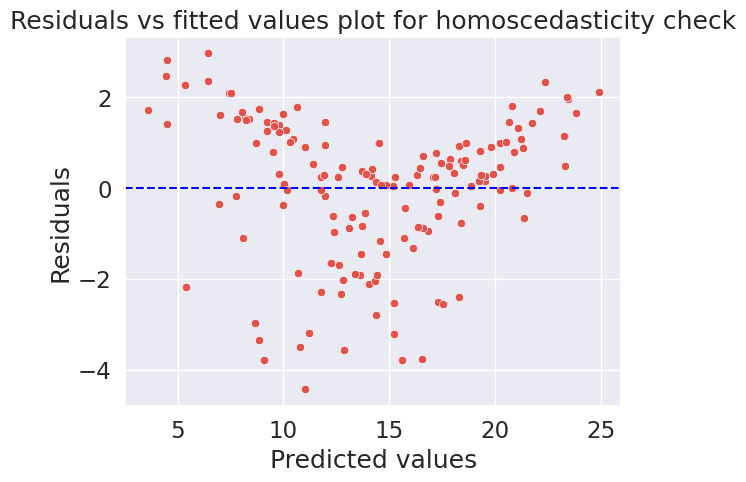

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' and 'residuals' are arrays or lists containing your data
# Make sure they have the same length

# Create a DataFrame to hold your data
data = pd.DataFrame({'y_pred': y_pred, 'residuals': residuals})

# Create a scatter plot using Seaborn
sns.scatterplot(data=data, x='y_pred', y='residuals')

# Draw a horizontal line at y=0 using matplotlib's axhline
plt.axhline(y=0, color='blue', linestyle='--')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

Assumption 4: Check for Normality of error terms/residuals

How to Check?

Use Distribution plot on the residuals and see if it is normally distributed.

How to Fix?

If the Residuals are not normally distributed, non–linear transformation of the dependent or independent variables can be tried.

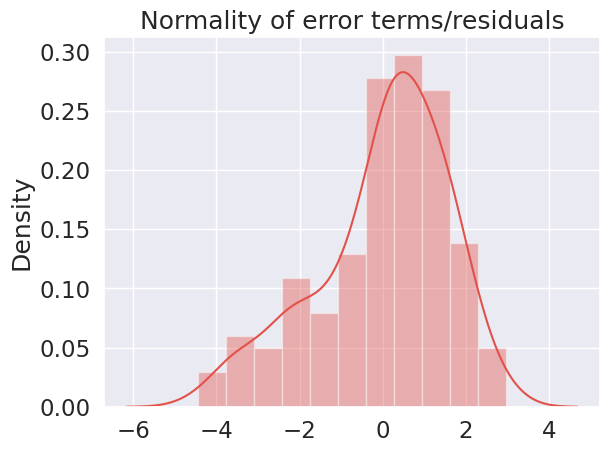

In [19]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Assumption 5. No autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
There should not be autocorrelation in the data so the error terms should not form any pattern.

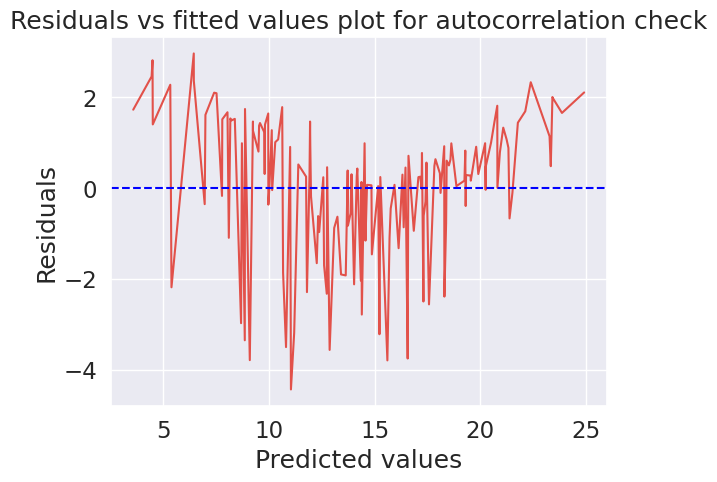

In [26]:
data = pd.DataFrame({'y_pred': y_pred, 'residuals': residuals})

# Create a scatter plot using Seaborn
sns.lineplot(data=data, x='y_pred', y='residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
Null Hypothesis: Autocorrelation is absent.
Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic as diag

min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.008425577339963727

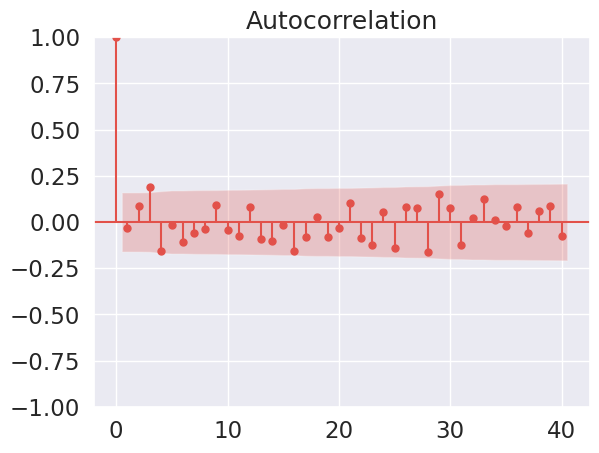

In [32]:
# Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

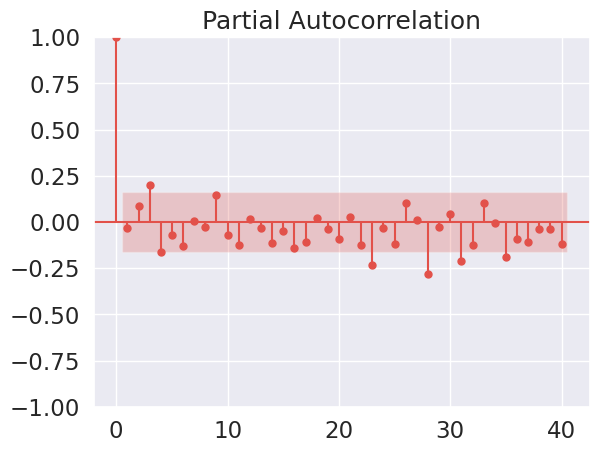

In [33]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

In [34]:
# The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data

Assumption 6. No perfect multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

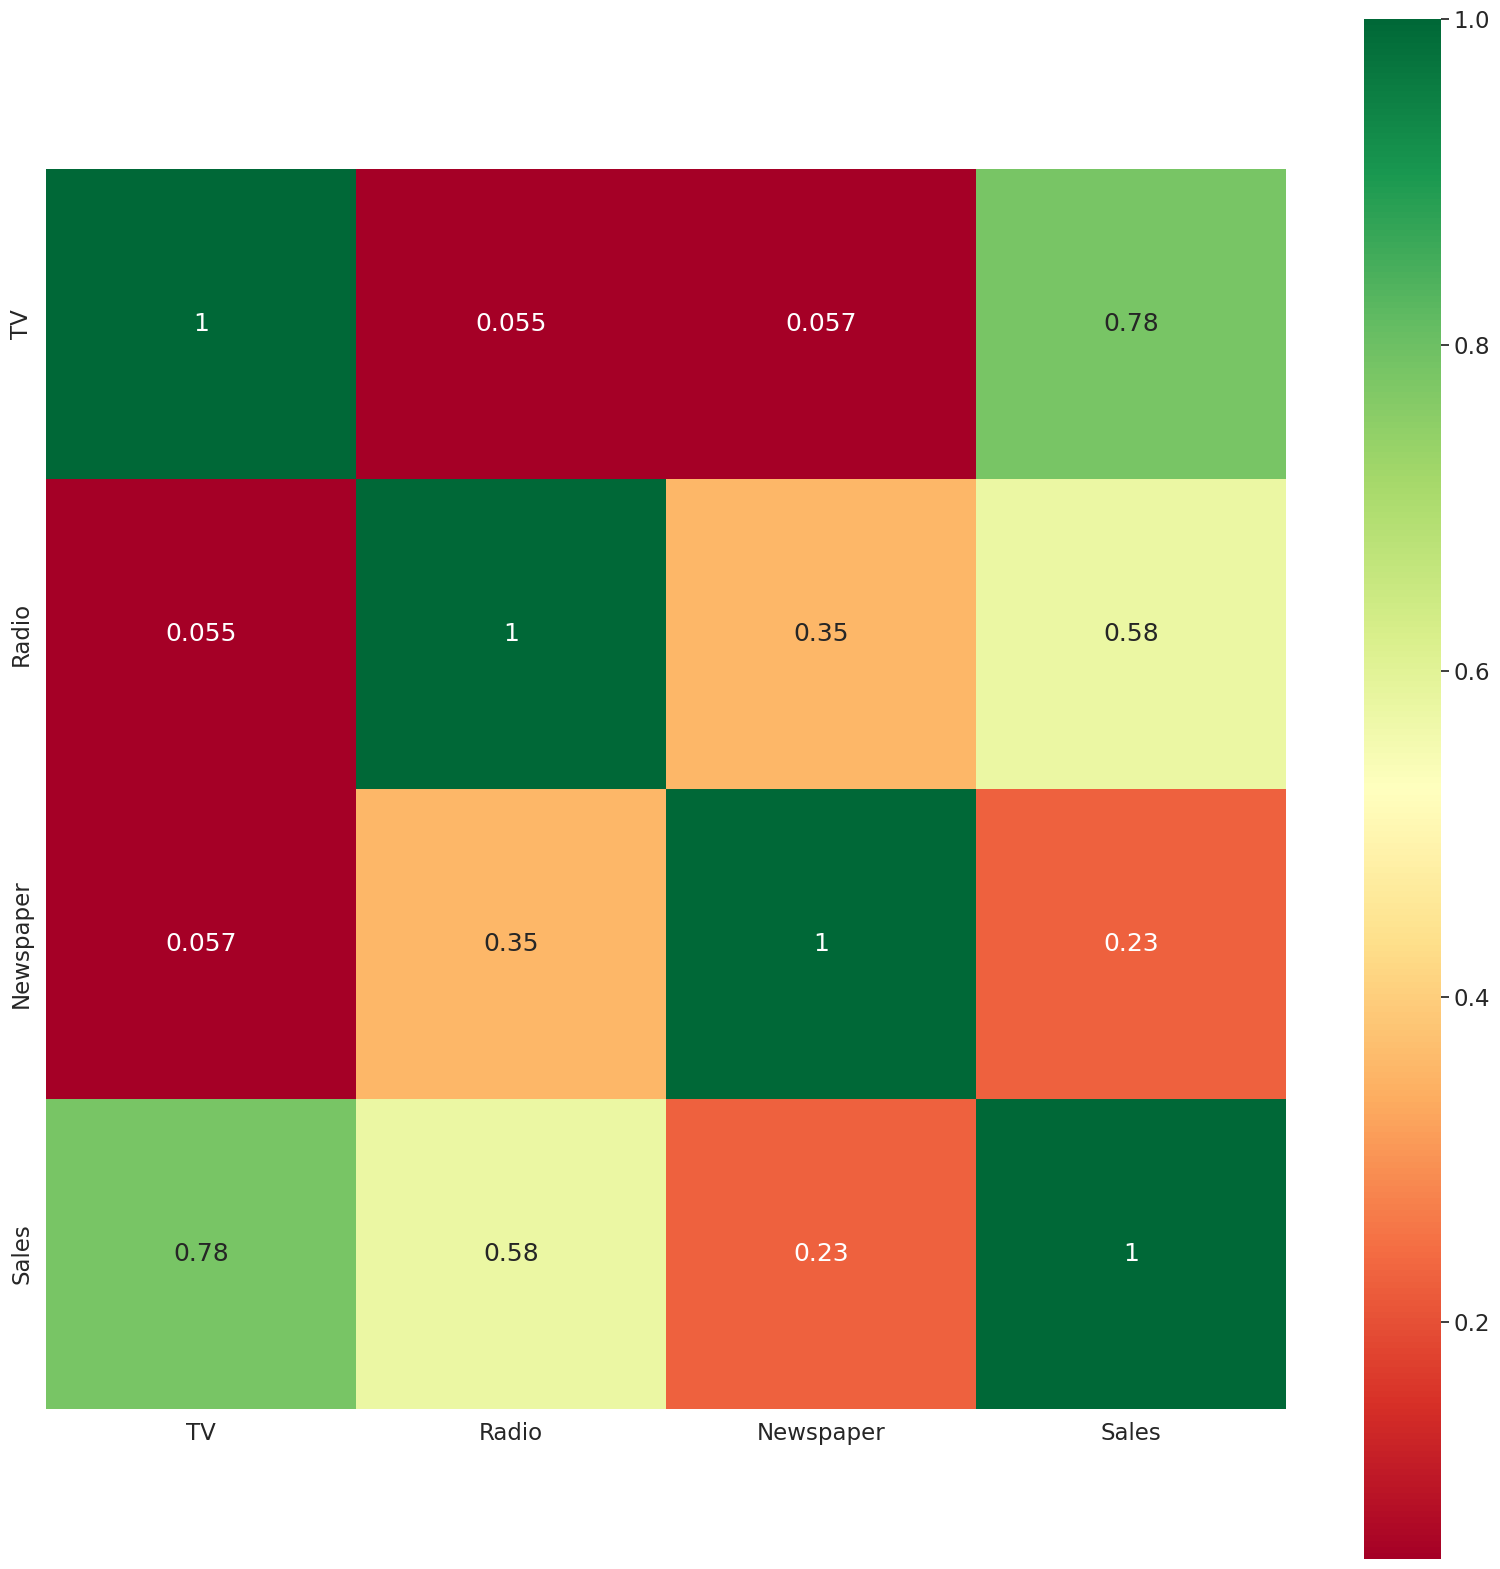

In [35]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using a real-world scenario.

Intercept (β0): The intercept is the value of the response variable when all predictor variables are set to zero. It represents the baseline value of the response variable when no predictors are influencing it. In some cases, the intercept might not have a practical interpretation.

Slope (β1): The slope represents the change in the response variable for a one-unit change in the predictor variable. It quantifies the relationship and direction of influence between the predictor and the response. A positive slope means that as the predictor variable increases, the response variable also increases. A negative slope means the opposite

Example: Predicting Housing Prices

Imagine you are a real estate agent trying to predict the selling price of houses based on their size in square feet. You collect data on various houses, including their sizes and the corresponding sale prices. After performing a simple linear regression analysis, you obtain the following equation:

Sale Price=50000+100⋅Size

In this equation:

The intercept (β0) is 50000. This represents the estimated sale price when the size of the house is zero, which doesn't make practical sense in this context.

The slope (β1) is 100. This indicates that for every one-unit increase in size (square feet), you can expect the sale price to increase by 100 units of the currency (e.g., dollars).

Interpretation:

Intercept: In this case, the intercept doesn't have a meaningful interpretation since it implies a house with a size of zero, which doesn't exist. This is a limitation of interpreting intercepts when they don't have a practical meaning in the context.

Slope: The slope of 100 indicates that for each additional square foot of size, the sale price is estimated to increase by 100 units of the currency. This implies a positive correlation between the size of the house and its sale price.
For example, if you have a house with a size of 1500 square feet, you can estimate its sale price using the equation:

Sale Price=50000+100⋅1500=200000 units of currency

This interpretation helps you make predictions about the sale price of houses based on their size and understand how changes in size influence the predicted price.






# Q4. Explain the concept of gradient descent. How is it used in machine learning?

Gradient descent is an optimization algorithm used to find the minimum of a function. It's particularly important in the context of machine learning, where it's commonly used to optimize the parameters of a model in order to minimize a cost or loss function. The basic idea of gradient descent is to iteratively adjust the parameters of a model in the direction that decreases the cost function the most.

Here's a step-by-step explanation of the concept of gradient descent and how it's used in machine learning:

Objective Function: In machine learning, you're often trying to find the best set of parameters for a model that minimizes a cost or loss function. This function quantifies how far off your predictions are from the actual values.

Gradient: The gradient of a function represents the direction and magnitude of the steepest ascent. In other words, it indicates the direction in which the function is increasing the fastest.

Update Rule: Gradient descent works by iteratively adjusting the model's parameters in the opposite direction of the gradient of the cost function. This is because you want to move toward the minimum of the function to reduce the cost.

Learning Rate: The learning rate is a hyperparameter that determines the step size taken in each iteration. It controls how far along the gradient you move. A higher learning rate might lead to faster convergence but could also overshoot the minimum. A lower learning rate might converge more slowly but with more stable steps.

Iterations: You repeat the process of updating the parameters using the gradient and learning rate until the cost function converges to a minimum or reaches a predefined number of iterations.

Example: Linear Regression with Gradient Descent

Imagine you're training a linear regression model with the goal of finding the best-fitting line for a set of data points. The cost function in this case could be the mean squared error (MSE) between the predicted and actual values.

Initialize the model's parameters (slope and intercept) randomly or with some initial values.
Compute the gradient of the cost function with respect to the parameters. This tells you the direction and magnitude of the steepest ascent.
Update the parameters by subtracting the gradient multiplied by the learning rate. This moves the parameters in the direction that reduces the cost.
Repeat steps 2 and 3 for a certain number of iterations or until the cost function converges.
At the end of the process, you'll have parameter values that minimize the cost function, giving you the best-fitting line.

# Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

Multiple linear regression is an extension of simple linear regression that allows you to model the relationship between a dependent variable (also called the response variable) and multiple independent variables (also called predictor variables or features). In simple linear regression, you have one dependent variable and one independent variable, whereas in multiple linear regression, you have one dependent variable and two or more independent variables.

The multiple linear regression model can be represented by the following equation:
    
y=β0+β1​x1+β2​x2+…+βp​xp

Where:

y is the dependent variable (response).

β0 is the intercept, which represents the expected value of y when all x variables are set to zero.

β1,β2,…,βp are the coefficients of the independent variables x1,x2,…,xp respectively. They represent the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding other variables constant.

x1,x2,…,xp are the independent variables.

Differences between Multiple Linear Regression and Simple Linear Regression:

Number of Independent Variables:

Simple Linear Regression: In simple linear regression, you have only one independent variable.
Multiple Linear Regression: In multiple linear regression, you have two or more independent variables.


Model Complexity:

Simple Linear Regression: The model is simpler since it considers the relationship between one independent variable and the dependent variable.
Multiple Linear Regression: The model is more complex as it considers the combined effects of multiple independent variables on the dependent variable.


Interpretation of Coefficients:

Simple Linear Regression: Coefficients represent the change in the dependent variable for a one-unit change in the single independent variable.
Multiple Linear Regression: Coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding other variables constant.


Equation:

Simple Linear Regression: The equation involves only one independent variable, 

y=β0+β1x

Multiple Linear Regression: The equation includes multiple independent variables, 

y=β0+β1x1+β2x2+…+βpxp.

# Q6. Explain the concept of multicollinearity in multiple linear regression. How can you detect and address this issue?

Multicollinearity in multiple linear regression refers to a situation where two or more independent variables in the regression model are highly correlated with each other. This correlation between independent variables can lead to issues in the interpretation of the regression coefficients and can affect the stability and reliability of the regression model.

There are different ways to detect Multicollinearity.

Pairwise correlation between explanatory variables( X's) : If any pair found to have a correlation greater than 0.5 (taken arbitrarily) then the variables are considered to have a problem of multicolinearity.

Variance Inflation Factor (VIF): This method is the popular method to detect multicollinearity. In this method VIF is calculated by using the formula : 1/(1-R^2) where R^2 is the coefficient of determination for variable x(dependent) and remaining other (k-1) variables in the regression Model.

# Q7. Describe the polynomial regression model. How is it different from linear regression?

Polynomial regression is a type of regression analysis that extends the concept of linear regression by allowing the relationship between the independent variable(s) and the dependent variable to be modeled as an nth-degree polynomial equation. In contrast to linear regression, where the relationship is represented by a straight line, polynomial regression uses a curved line to fit the data. This is particularly useful when the relationship between the variables is not linear and can be better captured by a polynomial function.

y=β0​+β1​x+β2​x^2+β3​x^3+…+βn​x^n

Where:

y is the dependent variable (response).

x is the independent variable.

β0,β1,…,βn are the coefficients of the polynomial terms.

Model Flexibility:

Linear Regression: Fits a linear relationship between the variables, which might not accurately capture non-linear patterns in the data.

Polynomial Regression: Offers more flexibility to capture non-linear relationships by including higher-degree polynomial terms.
Curve Fitting:

Linear Regression: Fits a straight line that minimizes the sum of squared differences between the predicted and actual values.

Polynomial Regression: Fits a curve that may better capture the data's curvature.
Overfitting:

Linear Regression: Less prone to overfitting because it's simpler.

Polynomial Regression: Prone to overfitting, especially when using high-degree polynomials, which can lead to poor generalization on new data.
Degree of Polynomial:

Linear Regression: Essentially a special case of polynomial regression with a degree of 1.

Polynomial Regression: The degree of the polynomial (n) determines the complexity of the model. A higher degree allows the model to fit more intricate patterns, but it also increases the risk of overfitting.

Equation Form:

Linear Regression: The equation is a straight line (y=β0+β1​x).

Polynomial Regression: The equation is a polynomial function of degree n, allowing for curved relationships (y=β0+β1​x+β2​x^2+…+βn​x^n)


# Q8. What are the advantages and disadvantages of polynomial regression compared to linear regression? In what situations would you prefer to use polynomial regression?

-------------------------Advantages of Polynomial Regression compared to Linear Regression:----------------------------------------------------------

Capturing Non-Linearity: Polynomial regression can capture non-linear relationships between variables, which linear regression cannot. This is advantageous when the true relationship between variables is curved or nonlinear.

Flexibility: Polynomial regression allows for greater flexibility in modeling complex patterns in the data. By including higher-degree polynomial terms, you can closely fit the data points.

Better Fit: When the data exhibits a clear curvature, polynomial regression can provide a better fit and minimize the residual errors.



--------------------------------Disadvantages of Polynomial Regression compared to Linear Regression:------------------------------------------------

Overfitting: Polynomial regression, especially with high-degree polynomials, is prone to overfitting the training data. The model may capture noise in the data and perform poorly on new, unseen data.

Complexity: Higher-degree polynomial models are more complex and difficult to interpret. It becomes challenging to differentiate the true underlying relationship from noise.

Extrapolation Issues: Polynomial models can yield unrealistic predictions when extrapolated beyond the range of the training data. Extrapolation can lead to unreliable results.

More Data Requirement: Higher-degree polynomial models require more data to generalize effectively. With limited data, these models might produce unreliable results.


-----------------------------------------------When to Prefer Polynomial Regression:--------------------------------------------------------------

Curved Relationships: Use polynomial regression when you suspect that the relationship between the variables is not linear but exhibits a curve or other non-linear pattern.

Nonlinear Trend: If visual inspection of the data reveals a non-linear trend, polynomial regression might be a better choice to capture the underlying pattern.

Limited Model Complexity: When the dataset isn't very large and you're confident that the underlying relationship isn't too complex, you can use polynomial regression cautiously.

Domain Knowledge: When you have domain knowledge that suggests a specific degree of polynomial can accurately model the relationship, you can use that knowledge to guide your choice.